In [1]:
install.packages('ISLR')
#install.packages('car')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘curl’, ‘nloptr’, ‘pbkrtest’, ‘rio’, ‘lme4’

Warning message in install.packages("car"):
“installation of package ‘curl’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘rio’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(ISLR)
attach(Auto)


The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



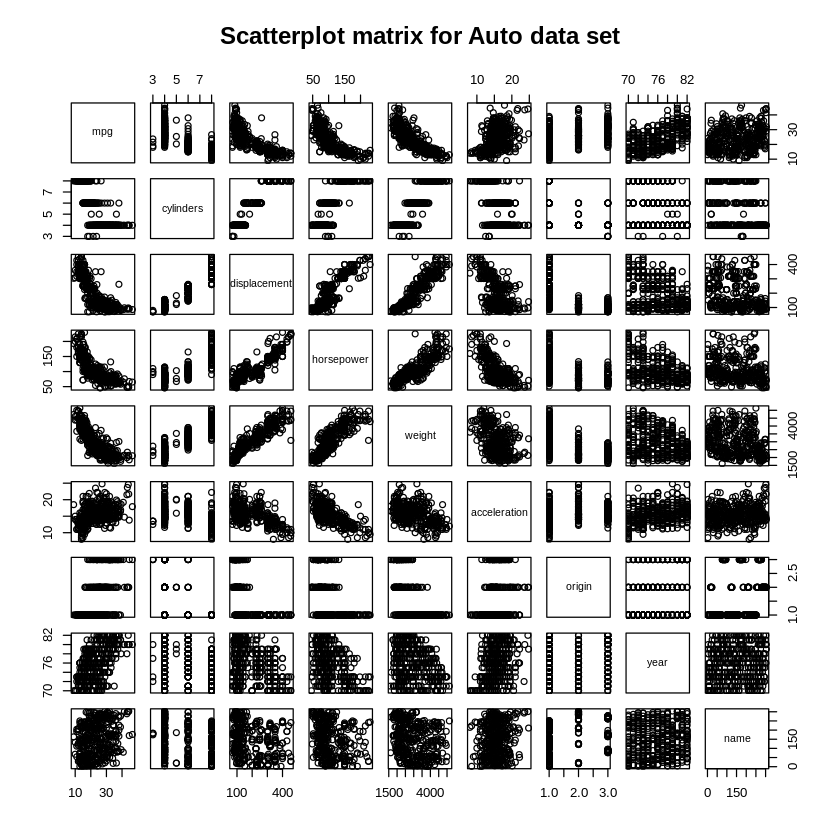

In [7]:
pairs(~mpg+cylinders+displacement+horsepower+weight+acceleration+origin+year+name, main = "Scatterplot matrix for Auto data set")


In [9]:
x <- data.frame(mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin)
correlation <- data.frame(cor(x, y=NULL))



Call:
lm(formula = mpg ~ cylinders + displacement + acceleration + 
    weight + origin + horsepower + year)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
acceleration   0.080576   0.098845   0.815  0.41548    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
horsepower    -0.016951   0.013787  -1.230  0.21963    
year           0.750773   0.050973  14.729  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


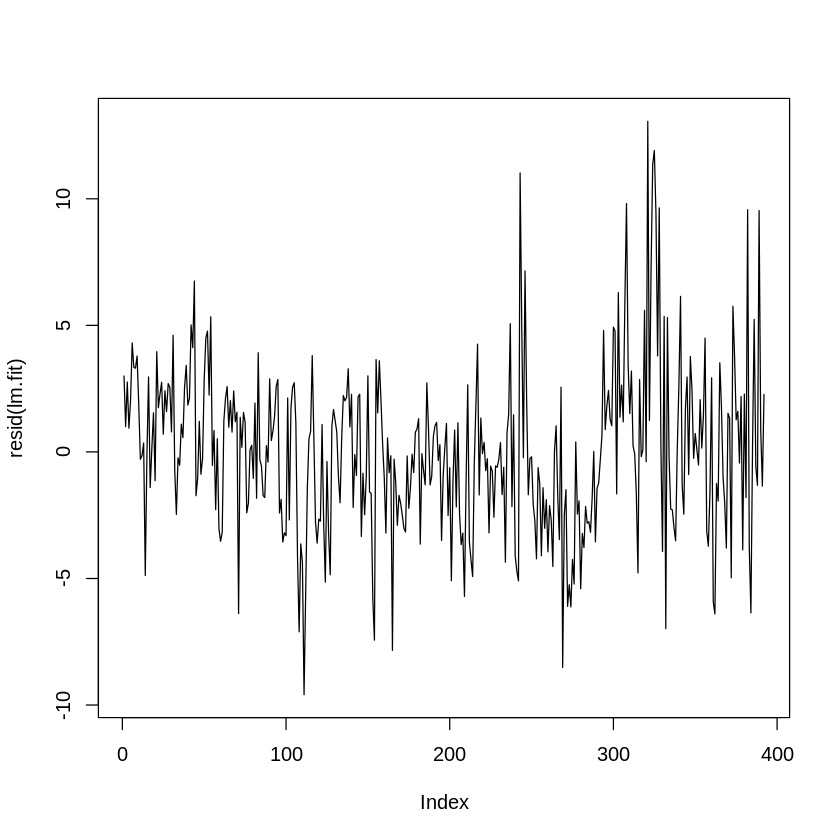

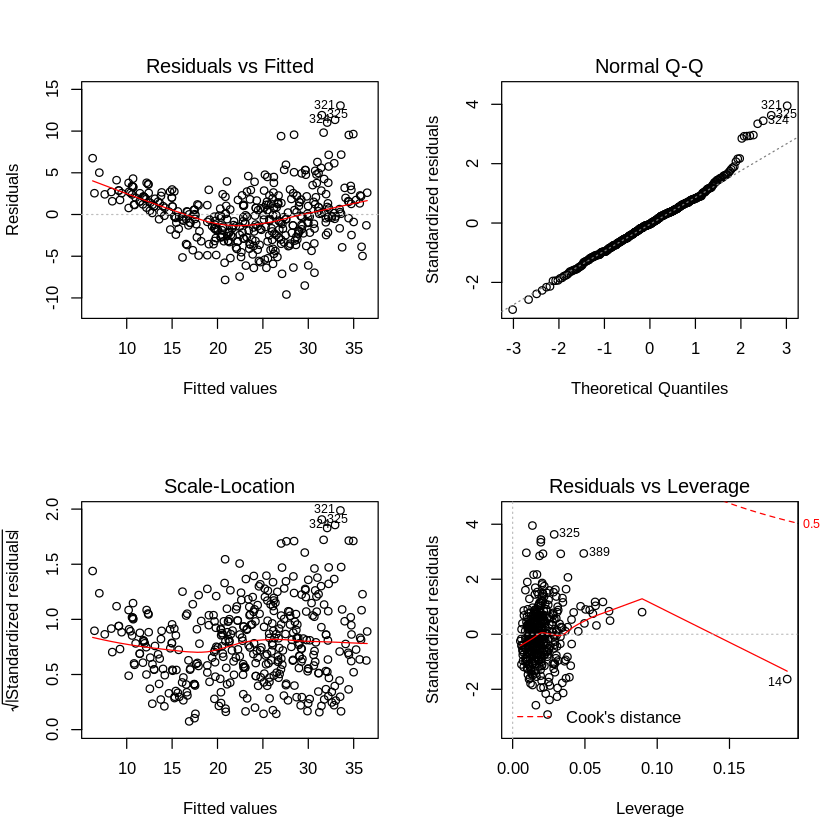

In [10]:
lm.fit <- lm(mpg ~ cylinders + displacement + acceleration + weight + origin + horsepower + year)
summary(lm.fit)
plot(resid(lm.fit), type = "l")
par(mfrow = c(2,2))
plot(lm.fit)

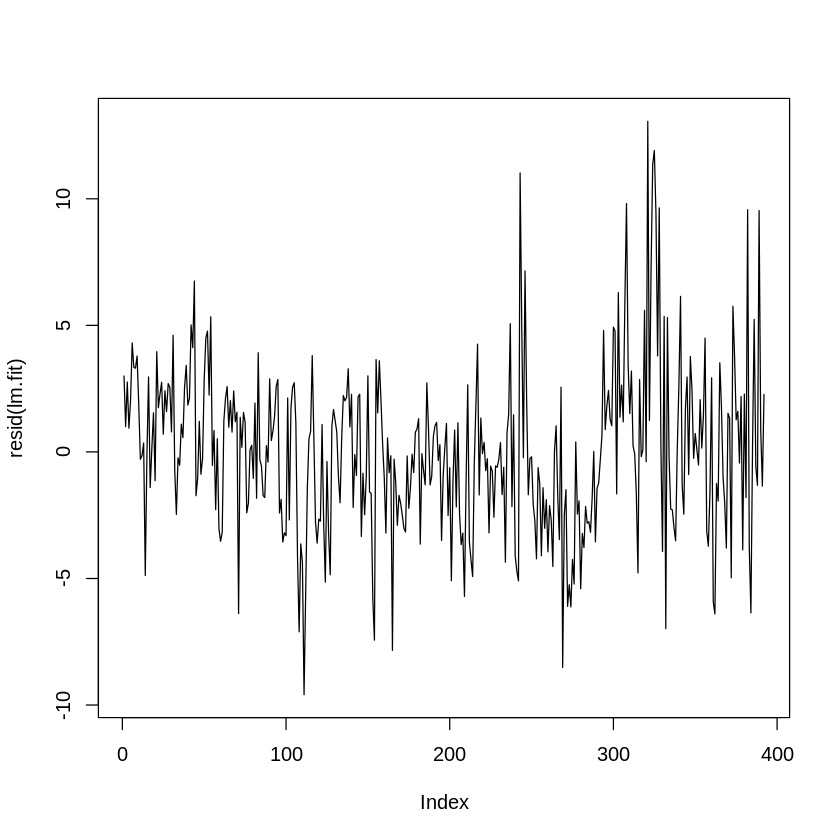

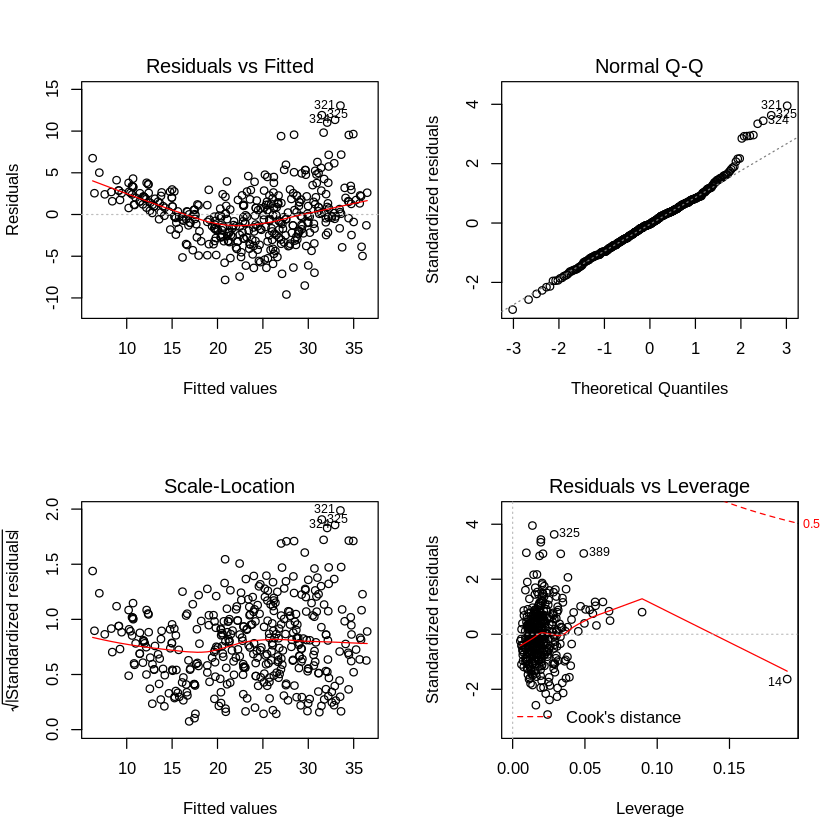

In [11]:
plot(resid(lm.fit), type = "l")
par(mfrow = c(2,2))
plot(lm.fit)
par(mfrow = c(1,1))


In [19]:
#Is there serious collinearity problem in the model? Which predictors are collinear?

vif(lm.fit)
#Not able to install 'car' package in ipynb

ERROR: Error in vif(lm.fit): could not find function "vif"


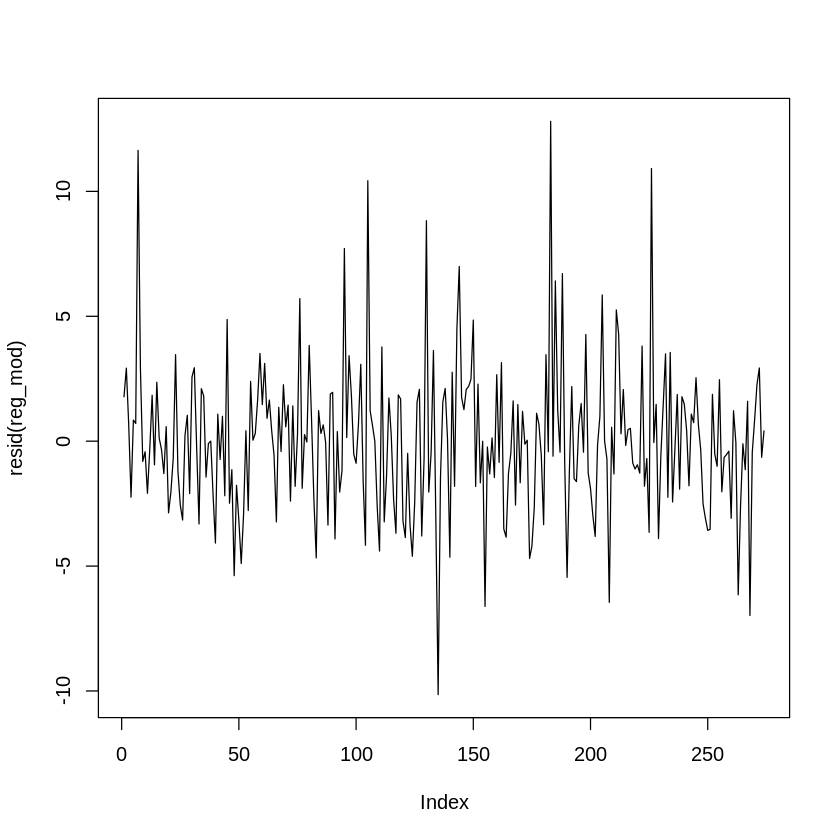

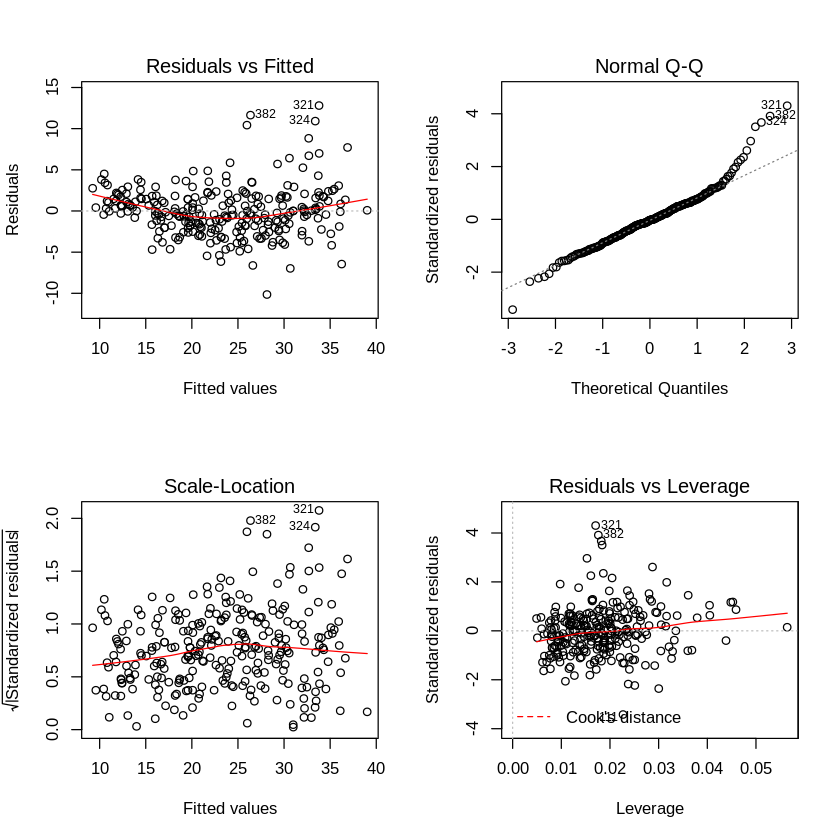

In [14]:
#Fit a series of regression models including all terms, interaction terms and non-linear effects employing the
#procedures discussed in class. Make sure you validate the model and indicate the best model in teh report.

x <- data.frame(mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin)
sample_size <- floor(0.7 * nrow(x))
train_data <- sample(seq_len(nrow(x)), size = sample_size)
train <- x[train_data, ]
test <- x[-train_data, ]
reg_mod <- lm(mpg ~ origin + year + I(log(sqrt(acceleration))) + I(sqrt(1/weight)), data = train)
summary_reg_mod <- summary(reg_mod)
#vif_reg_mod <- data.frame(vif(reg_mod))
plot(resid(reg_mod), type = "l")
par(mfrow = c(2,2))
plot(reg_mod)
predict_train <- predict(reg_mod, train)
compare_train <- data.frame(cbind(actual = train$mpg, predicted = predict_train))
train_mse <- (sum((compare_train$actual - compare_train$predicted)^2)/274)
predict_test <- predict(reg_mod, test)
compare_test <- data.frame(cbind(actual = test$mpg, predicted = predict_test))
test_mse <- (sum((compare_test$actual - compare_test$predicted)^2)/118)


In [18]:
#Report R^2 for test data

SSE <- sum((compare_test$actual - compare_test$predicted)^2)
SST <- sum((compare_test$actual - mean(compare_test$actual))^2)
r_square_test <- 1 - (SSE/SST)
r_square_test

[1] 0.8358902